<a href="https://colab.research.google.com/github/mmopenat/Image_processing/blob/main/Bulk_Fuel_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Use the correct delimiter and engine
absa_df = pd.read_csv("/content/ABSA.csv", delimiter=";", engine="python", on_bad_lines="skip")
caltex_df = pd.read_csv("/content/Caltex.csv", delimiter=";", engine="python", on_bad_lines="skip")
sasol_df = pd.read_csv("/content/Sasol.csv", delimiter=";", engine="python", on_bad_lines="skip")

# Preview the data
print(absa_df.head())
print(caltex_df.head())
print(sasol_df.head())



  Transaction Date QUANTITY   Amount Region Registration  \
0       2024/05/01      559  R12 390    KZN       EAS014   
1       2024/05/01      500  R12 065    KZN       EAS011   
2       2024/05/01      500  R12 065    KZN       EAS011   
3       2024/05/01      500  R12 215    KZN       EAS013   
4       2024/05/01      500  R12 080    KZN       EAS018   

             Merchant Name  
0   JABULA SERVICE STATION  
1  HERMENS SERVICE STATION  
2  HERMENS SERVICE STATION  
3      SHELL MOSES MABHIDA  
4         ENGEN AT ESSACKS  
         Unnamed: 0 5 158 730   R118 683 940 Unnamed: 3    Unnamed: 4  \
0  Transaction Date   QUANTITY       Amount      Region  Registration   
1        2024/04/01     300,00    R7 497,00         EAS     VDCBB06EC   
2        2024/04/01     500,00   R12 430,00         EAS     VDCBB10EC   
3        2024/04/01     500,00   R12 430,00         EAS     VDCBB05EC   
4        2024/04/01     363,93    R9 000,00         LIM    VDCBB04LIM   

     Unnamed: 5           

In [7]:
import pandas as pd

# Load and clean the ABSA file
absa_df = pd.read_csv("/content/ABSA.csv", delimiter=";", engine="python", on_bad_lines="skip")

# Standardize column names
absa_df.columns = [col.strip() for col in absa_df.columns]

# Identify columns
date_col = [col for col in absa_df.columns if 'date' in col.lower()][0]
region_col = [col for col in absa_df.columns if 'region' in col.lower()][0]
quantity_col = [col for col in absa_df.columns if 'quantity' in col.lower()][0]

# Convert data types
absa_df[date_col] = pd.to_datetime(absa_df[date_col], errors='coerce')
absa_df[quantity_col] = pd.to_numeric(absa_df[quantity_col], errors='coerce')

# Extract month
absa_df['Month'] = absa_df[date_col].dt.to_period('M')

# Group and summarize
summary = absa_df.groupby([region_col, 'Month'])[quantity_col].sum().reset_index()
summary.columns = ['Region', 'Month', 'Total Quantity']

# Show result
print(summary.head())

# Save to CSV
summary.to_csv("/content/ABSA_Quantity_Summary.csv", index=False)



  Region    Month  Total Quantity
0    CEN  2024-05         80402.0
1    CEN  2024-06         62048.0
2    CEN  2024-07         51699.0
3    CEN  2024-08             0.0
4    CEN  2024-09             0.0


In [9]:
import pandas as pd

# Assuming you already have absa_summary from previous steps
absa_pivot = absa_summary.pivot(index='Month', columns='Region', values='Total Quantity')

# Rename columns to match the format: "REGION ABSA"
absa_pivot.columns = [f"{region} ABSA" for region in absa_pivot.columns]

# Add a Total column
absa_pivot["Total ABSA"] = absa_pivot.sum(axis=1)

# Reset index and format the Month
absa_formatted = absa_pivot.reset_index()
absa_formatted['Month'] = absa_formatted['Month'].dt.strftime('%b-%y')

# Save to CSV
absa_formatted.to_csv("/content/ABSA_Formatted_Summary.csv", index=False)

# Display the result
print(absa_formatted.head())



    Month  CEN ABSA  EAS ABSA  KZN ABSA  LIM ABSA  MPU ABSA  NGA ABSA  \
0  May-24   80402.0   58024.0  134659.0    7585.0    4334.0   35361.0   
1  Jun-24   62048.0   44935.0  126461.0    5852.0    4609.0   13300.0   
2  Jul-24   51699.0   57999.0  116951.0    6683.0    2875.0    5821.0   
3  Aug-24       0.0       0.0       0.0       0.0       0.0       0.0   
4  Sep-24       0.0       0.0       0.0       0.0       0.0       0.0   

   SGA ABSA  WES ABSA  Total ABSA  
0    1877.0    8071.0    330313.0  
1       NaN    6607.0    263812.0  
2       NaN    6859.0    248887.0  
3       NaN       0.0         0.0  
4       NaN       0.0         0.0  


In [23]:
import pandas as pd

# Load Caltex file with no header and assign custom column names
caltex_df = pd.read_csv(
    "/content/Caltex.csv",
    delimiter=";",
    engine="python",
    header=None,          # tells pandas there is no header
    names=['Transaction Date', 'Quantity', 'Amount', 'Region', 'Vehicle No', 'Internal Ref', 'Merchant Name', 'Line No'],
    on_bad_lines="skip"
)

# Clean and convert data
caltex_df['Transaction Date'] = pd.to_datetime(caltex_df['Transaction Date'], errors='coerce')
caltex_df['Quantity'] = pd.to_numeric(caltex_df['Quantity'].str.replace(',', ''), errors='coerce')  # handle comma as decimal

# Extract month
caltex_df['Month'] = caltex_df['Transaction Date'].dt.to_period('M')

# Group and summarize
caltex_summary = caltex_df.groupby(['Region', 'Month'])['Quantity'].sum().reset_index()
caltex_summary.columns = ['Region', 'Month', 'Total Quantity']

# Save to CSV
caltex_summary.to_csv("/content/Caltex_Quantity_Summary.csv", index=False)

# Show result
print(caltex_summary.head())



  Region    Month  Total Quantity
0    CEN  2023-10       1061839.0
1    CEN  2023-11        484801.0
2    CEN  2023-12        268327.0
3    CEN  2024-01        806452.0
4    CEN  2024-02        272050.0


<ipython-input-23-4ccbf8108bd9>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  caltex_df['Transaction Date'] = pd.to_datetime(caltex_df['Transaction Date'], errors='coerce')


In [25]:
import pandas as pd

# Assuming you already have absa_summary from previous steps
caltex_pivot = caltex_summary.pivot(index='Month', columns='Region', values='Total Quantity')

# Rename columns to match the format: "REGION ABSA"
caltex_pivot.columns = [f"{region} Caltex" for region in caltex_pivot.columns]

# Add a Total column
caltex_pivot["Total Caltex"] = caltex_pivot.sum(axis=1)

# Reset index and format the Month
caltex_formatted = caltex_pivot.reset_index()
caltex_formatted['Month'] = caltex_formatted['Month'].dt.strftime('%b-%y')

# Save to CSV
caltex_formatted.to_csv("/content/Caltex_Formatted_Summary.csv", index=False)

# Display the result
print(caltex_formatted.head())

    Month  CEN Caltex  EAS Caltex  KZN Caltex  LIM Caltex  MPU Caltex  \
0  Oct-23   1061839.0   5172796.0   2010381.0   3414719.0   5130349.0   
1  Nov-23    484801.0   5598575.0   2431072.0   4311682.0   5433695.0   
2  Dec-23    268327.0   4913967.0   2089665.0   3229298.0   5883828.0   
3  Jan-24    806452.0   4664417.0   1859652.0   3900804.0   6100247.0   
4  Feb-24    272050.0   3696591.0   2906263.0   5328909.0   6128821.0   

   NGA Caltex  SGA Caltex  SGC Caltex  SGS Caltex  WES Caltex  Total Caltex  
0    752743.0   1474618.0         NaN         NaN    779953.0    19797398.0  
1   1010143.0   1564001.0         NaN         NaN   1303225.0    22137194.0  
2   1726400.0   1708009.0         NaN         NaN    997788.0    20817282.0  
3   1778485.0   1506617.0     16687.0     30000.0   2239911.0    22903272.0  
4   1509140.0   1428181.0    100521.0    152827.0   2746046.0    24269349.0  


In [26]:
import pandas as pd

# Load and clean the Caltex file (no header row)
caltex_df = pd.read_csv(
    "/content/Caltex.csv",
    delimiter=";",
    engine="python",
    header=None,
    names=[
        'Transaction Date', 'Quantity', 'Amount', 'Region',
        'Vehicle No', 'Internal Ref', 'Merchant Name', 'Line No'
    ],
    on_bad_lines="skip"
)

# Standardize column names (just in case)
caltex_df.columns = [col.strip() for col in caltex_df.columns]

# Convert data types
caltex_df['Transaction Date'] = pd.to_datetime(caltex_df['Transaction Date'], errors='coerce')
caltex_df['Quantity'] = pd.to_numeric(caltex_df['Quantity'].str.replace(',', ''), errors='coerce')  # Remove commas

# Extract month
caltex_df['Month'] = caltex_df['Transaction Date'].dt.to_period('M')

# Group and summarize
summary = caltex_df.groupby(['Region', 'Month'])['Quantity'].sum().reset_index()
summary.columns = ['Region', 'Month', 'Total Quantity']

# Show result
print(summary.head())

# Save to CSV
summary.to_csv("/content/Caltex_Quantity_Summary.csv", index=False)


  Region    Month  Total Quantity
0    CEN  2023-10       1061839.0
1    CEN  2023-11        484801.0
2    CEN  2023-12        268327.0
3    CEN  2024-01        806452.0
4    CEN  2024-02        272050.0


<ipython-input-26-2d1bb4cf678e>:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  caltex_df['Transaction Date'] = pd.to_datetime(caltex_df['Transaction Date'], errors='coerce')


In [29]:
import pandas as pd

# Load Sasol file (update the path if needed)
sasol_df = pd.read_csv(
    "/content/Sasol.csv",
    delimiter=";",
    engine="python",
    header=None,
    names=[
        'Transaction Date', 'Quantity', 'Amount', 'Region',
        'Vehicle No', 'Internal Ref', 'Merchant Name', 'Line No'
    ],
    on_bad_lines="skip"
)

# Convert types
sasol_df['Transaction Date'] = pd.to_datetime(sasol_df['Transaction Date'], errors='coerce')
sasol_df['Quantity'] = pd.to_numeric(sasol_df['Quantity'].str.replace(',', ''), errors='coerce')

# Extract month
sasol_df['Month'] = sasol_df['Transaction Date'].dt.to_period('M')

# Group and summarize
sasol_summary = sasol_df.groupby(['Region', 'Month'])['Quantity'].sum().reset_index()
sasol_summary.columns = ['Region', 'Month', 'Total Quantity']

# Pivot the summary
sasol_pivot = sasol_summary.pivot(index='Month', columns='Region', values='Total Quantity')
sasol_pivot.columns = [f"{region} SASOL" for region in sasol_pivot.columns]
sasol_pivot["Total SASOL"] = sasol_pivot.sum(axis=1)

# Format and save
sasol_formatted = sasol_pivot.reset_index()
sasol_formatted['Month'] = sasol_formatted['Month'].dt.strftime('%b-%y')
sasol_formatted.to_csv("/content/Sasol_Formatted_Summary.csv", index=False)

# Preview
print(sasol_formatted.head())



    Month  CEN SASOL  EAS SASOL  KZN SASOL  LIM SASOL  MPU SASOL  NGA SASOL  \
0  Oct-23        NaN  1249267.0        NaN  2706508.0  4611671.0  7296567.0   
1  Nov-23    34059.0  1110249.0        NaN  2315035.0  4693991.0  7312769.0   
2  Dec-23    61371.0  1014425.0        NaN  2441895.0  5691932.0  7384750.0   
3  Jan-24        NaN   589166.0   110194.0  3251297.0  5827534.0  8381438.0   
4  Feb-24    37785.0   537718.0   795347.0  4419041.0  6474913.0  8789752.0   

    SGA SASOL  SGS SASOL  WES SASOL  Total SASOL  
0  13379258.0  3064941.0   935115.0   33243327.0  
1  16752453.0  3026860.0   986675.0   36232091.0  
2  15351274.0  1957107.0  1048598.0   34951352.0  
3  17998690.0  1989808.0  1074711.0   39222838.0  
4  16262338.0  1188728.0   869383.0   39375005.0  


<ipython-input-29-f59897f99ea3>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sasol_df['Transaction Date'] = pd.to_datetime(sasol_df['Transaction Date'], errors='coerce')


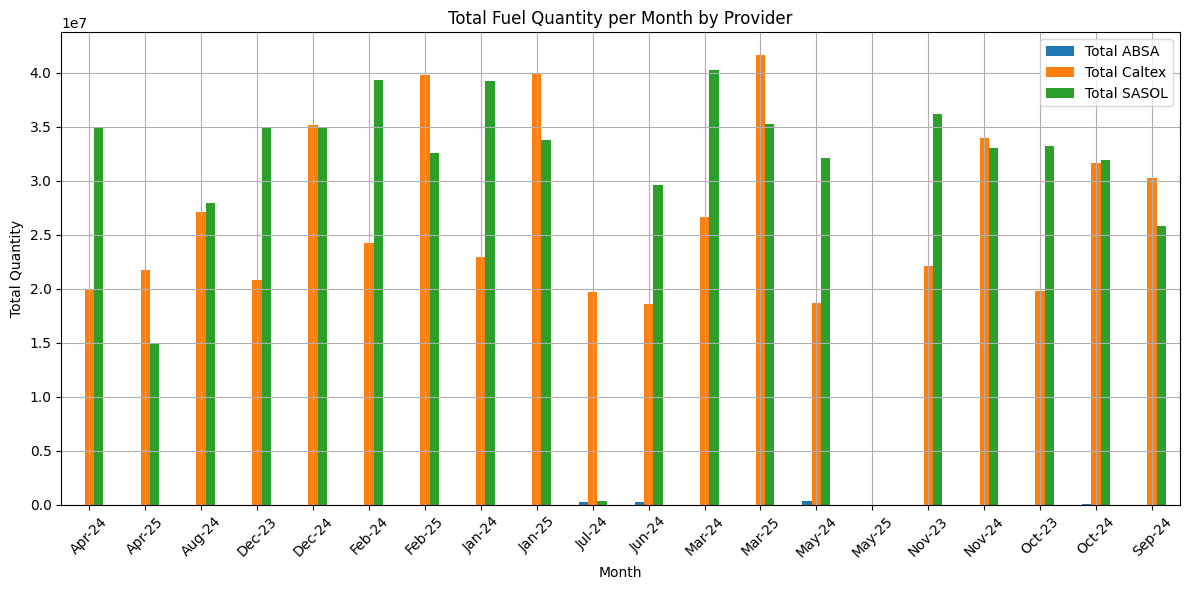

In [33]:
import matplotlib.pyplot as plt

# Plot the bar chart
plot_df.plot(kind='bar', figsize=(12, 6))
plt.title("Total Fuel Quantity per Month by Provider")
plt.xlabel("Month")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()
